In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [2]:
import plotting_functions as plot

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.shape

(1460, 81)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

The columns that are objects are categorical variables and the following functions turn them into categorical variabled. The MSSubClass variable is an int64 when it should be categorical so that is changed as well.

# Missing Values

Looking at the info print out from above, there are lots of missing values in the dataset. These will either have to be imputed, removed, or dealt with in a different manner.

In [6]:
train.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

The first feature to fix is electrical as it has only 1 missing value. Most houses according to the value counts below have SBrkr as the value.

In [7]:
train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [8]:
train[train['Electrical'].isnull()]['YearBuilt']

1379    2006
Name: YearBuilt, dtype: int64

The house that has the missing value was built in 2006. If you look at the rest of the houses that were built from 2000 on, all have SBrkr. We will fill the missing value with 'SBrkr'.

In [9]:
train[train['YearBuilt'].astype(int) >= 2000]['Electrical'].value_counts()

SBrkr    387
Name: Electrical, dtype: int64

In [10]:
train['Electrical'] = train['Electrical'].fillna('SBrkr')

The next features that should be dealt with are the basement features. When you look at the basement features together, the houses that don't have basements have no basement square footage. With that being said, the missing values will be filled with 'None'.

In [11]:
train[train['BsmtQual'].isnull()][['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure','TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,BsmtExposure,TotalBsmtSF
17,NaN,NaN,NaN,NaN,NaN,0
39,NaN,NaN,NaN,NaN,NaN,0
90,NaN,NaN,NaN,NaN,NaN,0
102,NaN,NaN,NaN,NaN,NaN,0
156,NaN,NaN,NaN,NaN,NaN,0
182,NaN,NaN,NaN,NaN,NaN,0
259,NaN,NaN,NaN,NaN,NaN,0
342,NaN,NaN,NaN,NaN,NaN,0
362,NaN,NaN,NaN,NaN,NaN,0
371,NaN,NaN,NaN,NaN,NaN,0


In [12]:
train[train['BsmtFinType2'].isnull()][['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure','TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,BsmtExposure,TotalBsmtSF
17,NaN,NaN,NaN,NaN,NaN,0
39,NaN,NaN,NaN,NaN,NaN,0
90,NaN,NaN,NaN,NaN,NaN,0
102,NaN,NaN,NaN,NaN,NaN,0
156,NaN,NaN,NaN,NaN,NaN,0
182,NaN,NaN,NaN,NaN,NaN,0
259,NaN,NaN,NaN,NaN,NaN,0
332,Gd,TA,GLQ,NaN,No,3206
342,NaN,NaN,NaN,NaN,NaN,0
362,NaN,NaN,NaN,NaN,NaN,0


In [13]:
train['BsmtQual'] = train['BsmtQual'].fillna('None')
train['BsmtCond'] = train['BsmtCond'].fillna('None')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('None')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('None')
train['BsmtExposure'] = train['BsmtExposure'].fillna('None')

For fireplaces, the missing values are based on the fact that the houses do not have a fireplace. The missing values will be filled with 'None'.

In [14]:
train[train['FireplaceQu'].isnull()][['Fireplaces','FireplaceQu']]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
17,0,NaN
18,0,NaN
19,0,NaN
26,0,NaN
29,0,NaN


In [15]:
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

In [16]:
train['FireplaceQu'].value_counts()

None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64

The next features that need to be dealt with are the garage missing values. The missing values are because houses do not have a garage. The missing values will be filled with 'None'.

In [17]:
train[train['GarageType'].isnull()][['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual',
                                    'GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
99,NaN,NaN,NaN,0,0,NaN,NaN
108,NaN,NaN,NaN,0,0,NaN,NaN
125,NaN,NaN,NaN,0,0,NaN,NaN
127,NaN,NaN,NaN,0,0,NaN,NaN
140,NaN,NaN,NaN,0,0,NaN,NaN


In [18]:
train['GarageType'] = train['GarageType'].fillna('None')
train['GarageYrBlt'] = train['GarageYrBlt'].fillna('None')
train['GarageQual'] = train['GarageQual'].fillna('None')
train['GarageCond'] = train['GarageCond'].fillna('None')
train['GarageFinish'] = train['GarageFinish'].fillna('None')

The masonry veneer type and area have missing values. There are 8 missing values for both and I took that to mean that the houses don't have masonry veneer. The missing values will be filled with 'None' and the value 0.

In [19]:
train[train['MasVnrType'].isnull()][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [20]:
train['MasVnrType'] = train['MasVnrType'].fillna('None')
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)

The last feature to address is lot frontage. For now, we'll impute that with the median of the dataset.

In [21]:
train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [22]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())

# Updating Feature Data Types

In [23]:
train['MSSubClass'] = train['MSSubClass'].astype('category')
train['OverallQual'] = train['OverallQual'].astype('category')
train['OverallCond'] = train['OverallCond'].astype('category')
train['YearBuilt'] = train['YearBuilt'].astype('category')
train['YearRemodAdd'] = train['YearRemodAdd'].astype('category')
train['GarageYrBlt'] = train['GarageYrBlt'].astype('category')
train['MoSold'] = train['MoSold'].astype('category')
train['YrSold'] = train['YrSold'].astype('category')
train['GarageCars'] = train['GarageCars'].astype('category')
train['Fireplaces'] = train['Fireplaces'].astype('category')
train['TotRmsAbvGrd'] = train['TotRmsAbvGrd'].astype('category')
train['KitchenAbvGr'] = train['KitchenAbvGr'].astype('category')
train['BedroomAbvGr'] = train['BedroomAbvGr'].astype('category')
train['HalfBath'] = train['HalfBath'].astype('category')
train['FullBath'] = train['FullBath'].astype('category')
train['BsmtHalfBath'] = train['BsmtHalfBath'].astype('category')
train['BsmtFullBath'] = train['BsmtFullBath'].astype('category')
train['BedroomAbvGr'] = train['BedroomAbvGr'].astype('category')

In [24]:
objects = train.select_dtypes(include='object')
cols = objects.columns
for i in cols:
    train[i] = train[i].astype('category')

In [25]:
train.drop(['PoolQC','Fence','MiscFeature','Alley'], inplace=True, axis=1)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null category
MSZoning         1460 non-null category
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null category
OverallCond      1460 non-null category
YearBuilt        1460 non-null category
YearRemodAdd     1460 non-null category
RoofStyle        1460 non-null category
RoofMatl         1460 non-null category
Exterior1st      146

# Sale Price Exploratory Analysis

In [27]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [28]:
len(train[train['SalePrice'] > 400000])

28

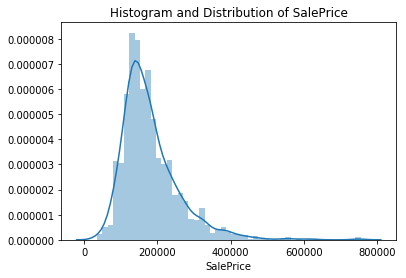

In [29]:
plot.histogram(train, 'SalePrice')

The median sales price for houses in Iowa is 163,000 and the mean is ~181,000. There are 28 sales that are greater than 400,000, which is more than double the median and the mean. The histogram shows that the histogram is right skewed meaning that the mean is greater than the median and the cluster of values is on the left side of the graph. This could mean that the log transform might be a better option when predicting.

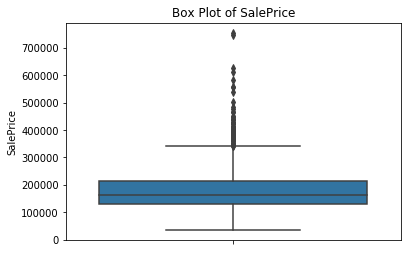

In [30]:
plot.boxplot(train, 'SalePrice')

When looking at the boxplot of the sales price, you can see that there are some very large values (> 500,000) that is causing the price to be skewed.

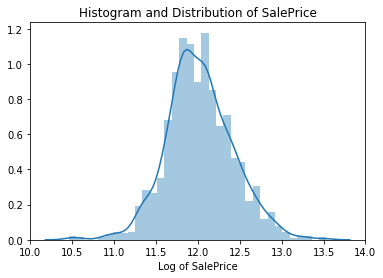

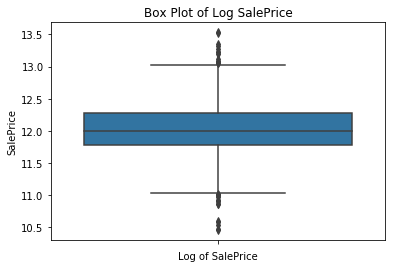

In [31]:
plot.histogram(train, 'SalePrice', True)
plot.boxplot(train, 'SalePrice', True)

When you take the log transform of the sales price, the data becomes a little more normal looking. The skew is almost gone from the histogram and boxplot. There also don't seem to be as many outliers in the data after the tranform.

# Numerical Variables

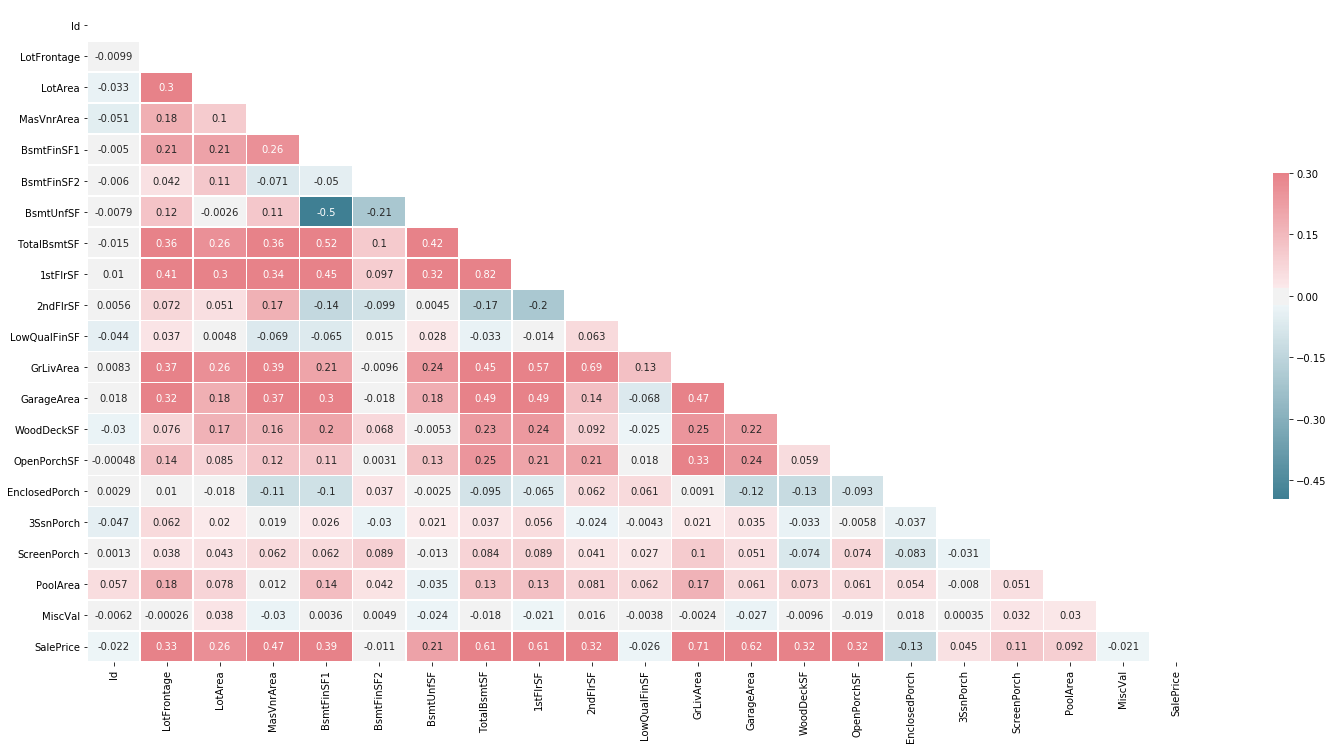

In [32]:
nums = train.select_dtypes(exclude='category')
plot.heatmap(nums)

Looking at the correlation heatmap, you can see some semi-strong correlations between some of the variables. This is important when looking at features that might need to be removed from modeling as they can potentially hurt the model performance. 
- Lot area and lot frontage are positively correlated, which makes sense. 
- Unfinished basement square footage and type 1 basement square footage are negatively correlated.
- The square footage features seem to be positively correlated with each other

For Sale price, you can see that there are many features that have a high, positive correlation. This can also be seen in the scatterplots below.

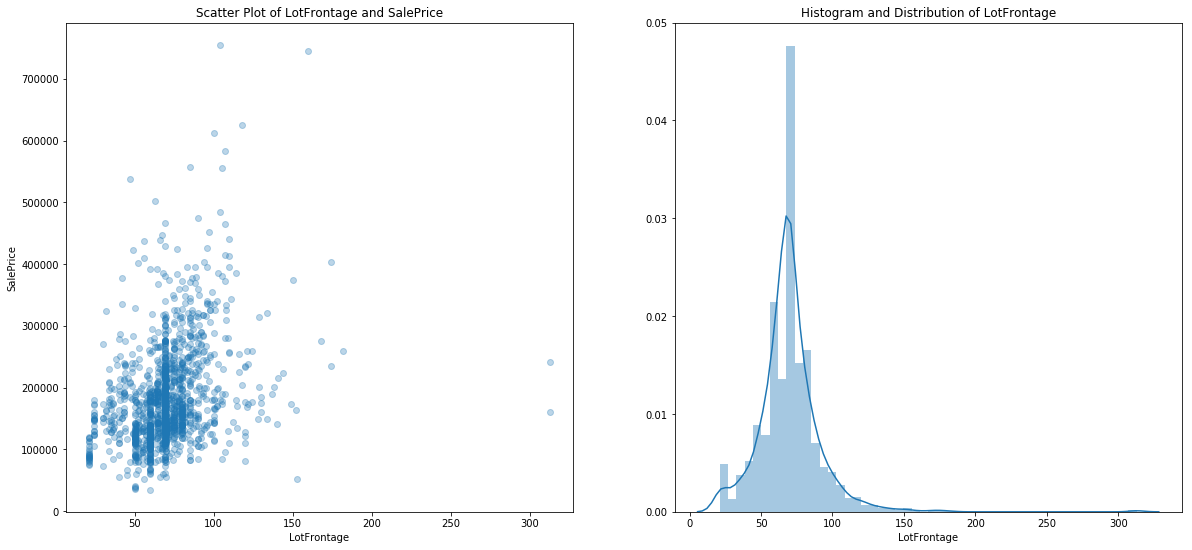

<Figure size 432x288 with 0 Axes>

In [33]:
plot.scatter_hist(train, 'LotFrontage', 'SalePrice')

The scatter plot above shows Lot Frontage and Sales Price. It shows a positive relationship between the two features but it is not very strong. The plot on the right shows that the distribution of the lot frontage is right skewed and is unimodal. This could be an issue if this variable is included in the analysis.

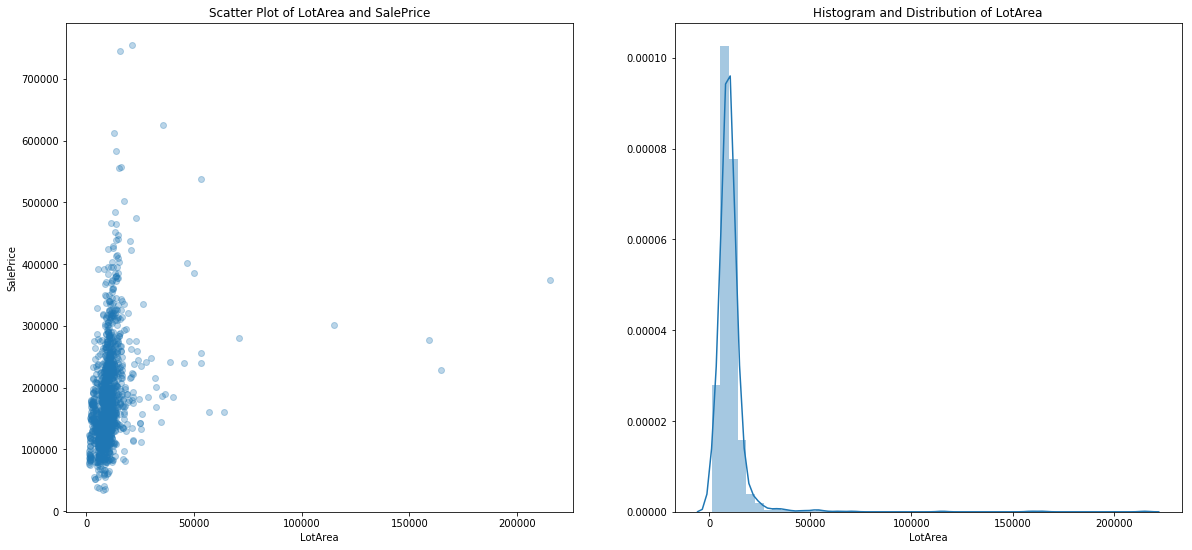

<Figure size 432x288 with 0 Axes>

In [34]:
plot.scatter_hist(train,'LotArea','SalePrice',False)

When looking at lot area and sale price, there is also a positive relationship but like lot frontage it is not that strong of a relationship. This might be due to some of the outliers in the dataset (lots > 35k/40k). The dataset is heavily skewed to the right which means that a transformation might need to be done to fix the skew.

            LotArea  SalePrice
LotArea    1.000000   0.379397
SalePrice  0.379397   1.000000


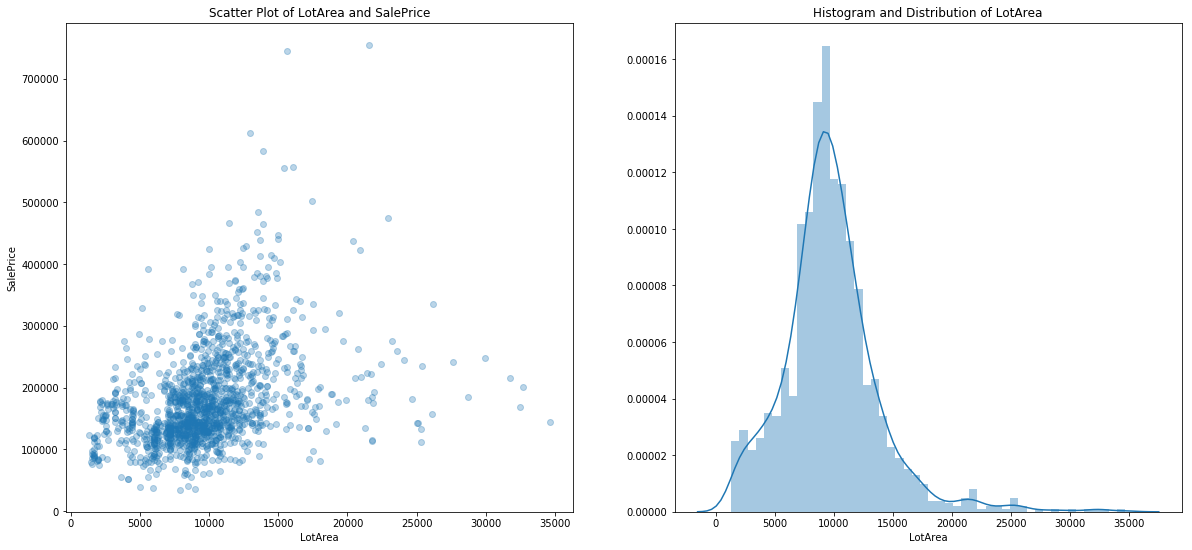

<Figure size 432x288 with 0 Axes>

In [35]:
smaller_lots = train[train['LotArea'] < 35000]
print(smaller_lots[['LotArea','SalePrice']].corr())
plot.scatter_hist(smaller_lots,'LotArea','SalePrice',False)

When removing the lots that are greater than 35k sqft, the relationship is still positive but only slightly stronger than before.

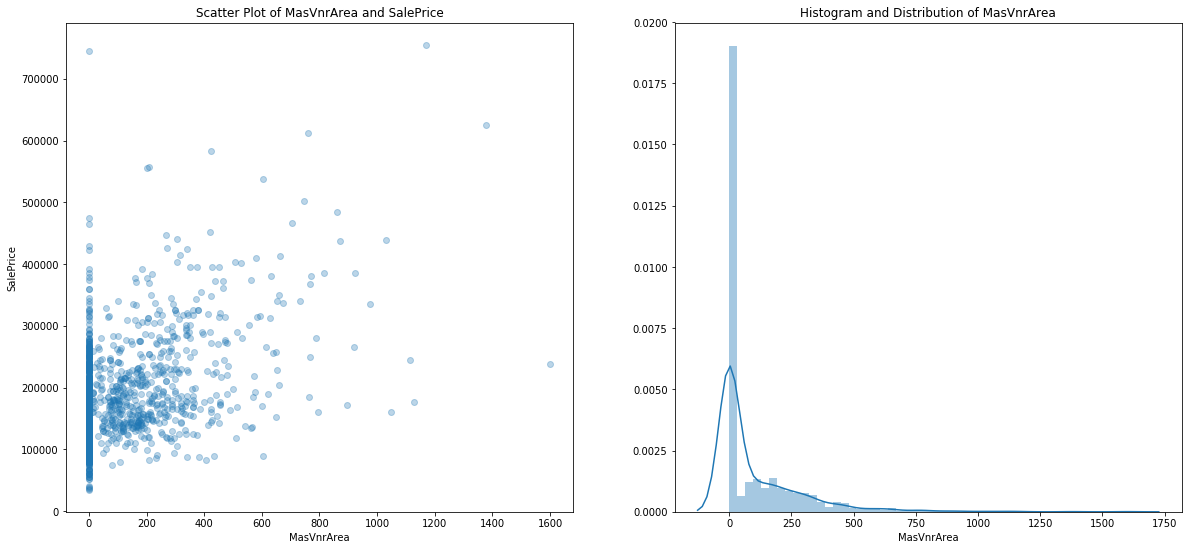

<Figure size 432x288 with 0 Axes>

In [36]:
plot.scatter_hist(train,'MasVnrArea','SalePrice',False)

The scatter plot for sale price and masonry veneer area in square feet shows a positive correlation though it is not very strong. There are a cluster of houses that do not have masonry square footage as seen above.

Looking at the histogram above, you can see that, like the other numerical features, this feature is also heavily skewed to the right.

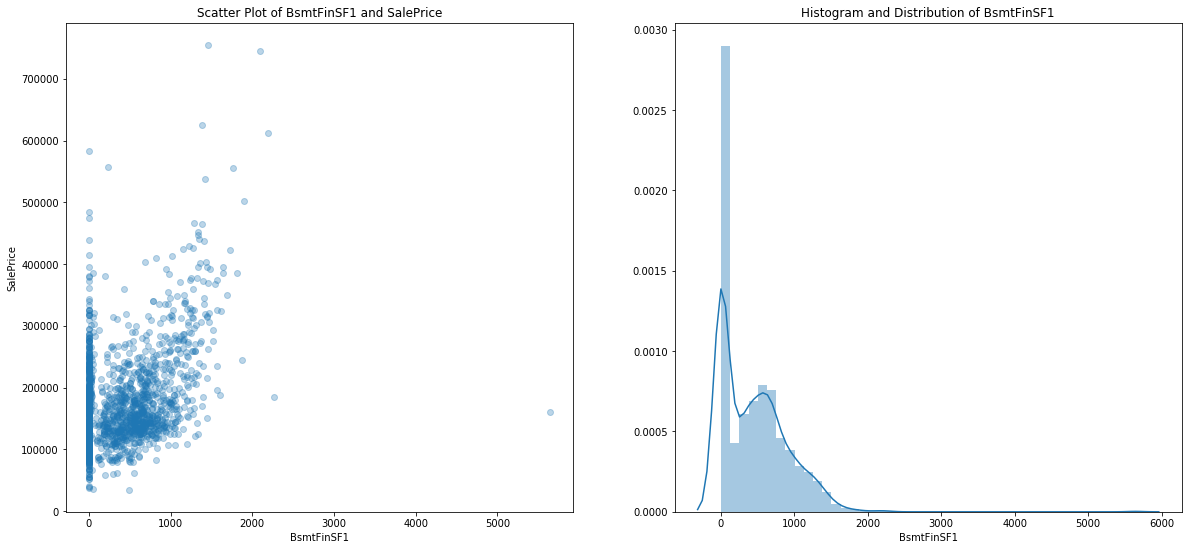

<Figure size 432x288 with 0 Axes>

In [37]:
plot.scatter_hist(train,'BsmtFinSF1','SalePrice',False)

The scatter plot of type 1 basement square footage and sales price shows a positive correlation between the two. The correlation seems to be fairly strong in that if you increase the square footage, the sale price increases. The distribution is also showing a skew to the right and the data is multi-modal.

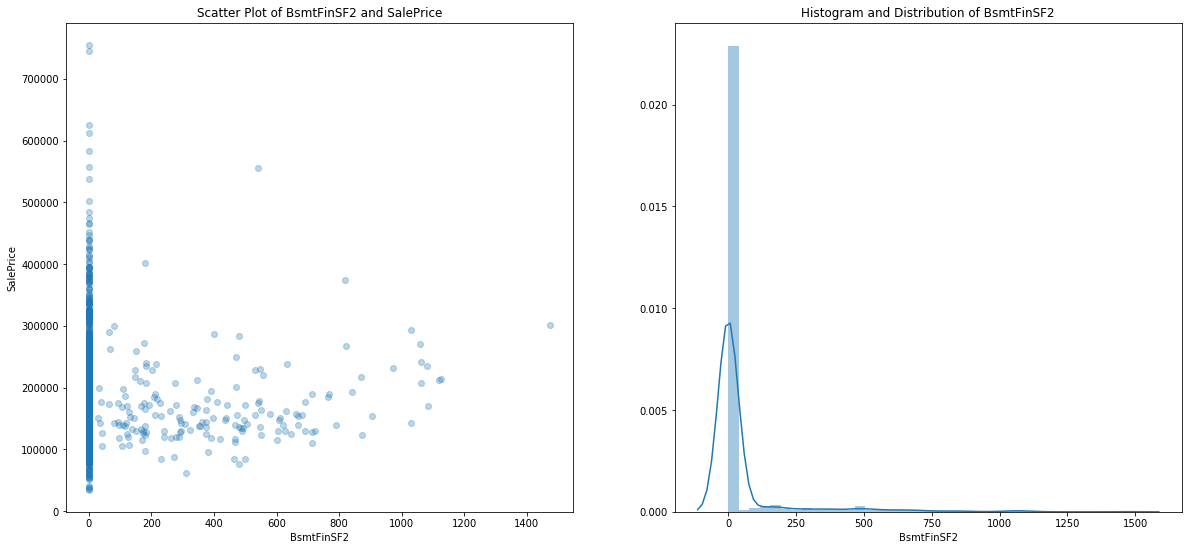

<Figure size 432x288 with 0 Axes>

In [38]:
plot.scatter_hist(train,'BsmtFinSF2','SalePrice',False)

The scatter plot of type 2 basement square footage and sales price does not show a positive correlation between the two. The distribution of type 2 basement square footage shows a right skewed dataset.

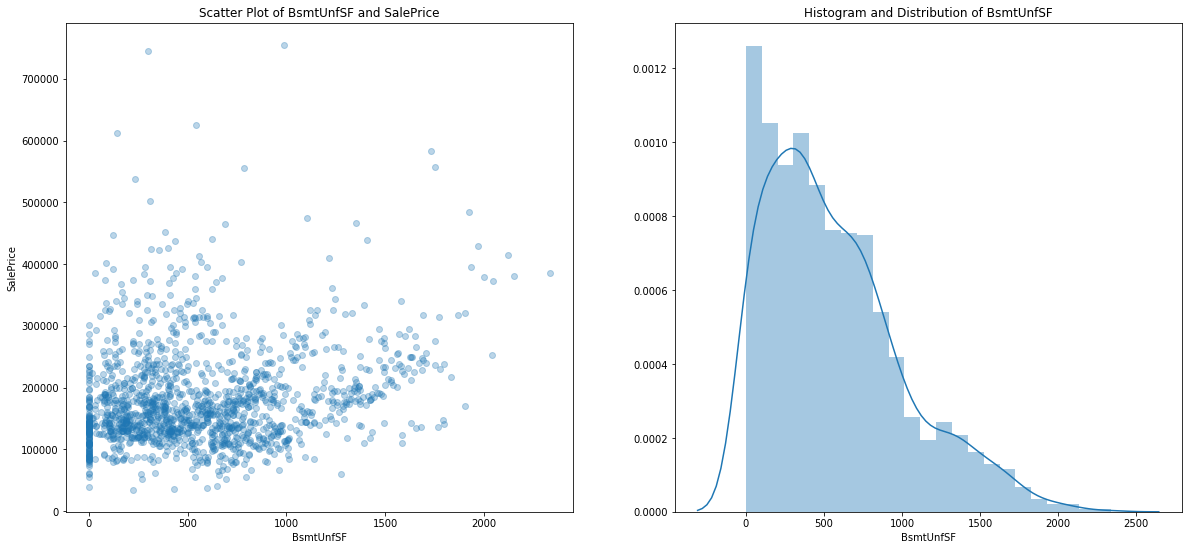

<Figure size 432x288 with 0 Axes>

In [39]:
plot.scatter_hist(train,'BsmtUnfSF','SalePrice',False)

The scatter plot of unfinished basement square footage and sales price shows a weak correlation between the two features. Unfinished basement square footage has a skewed distribution but it is not as skewed as some of the other numerical features.

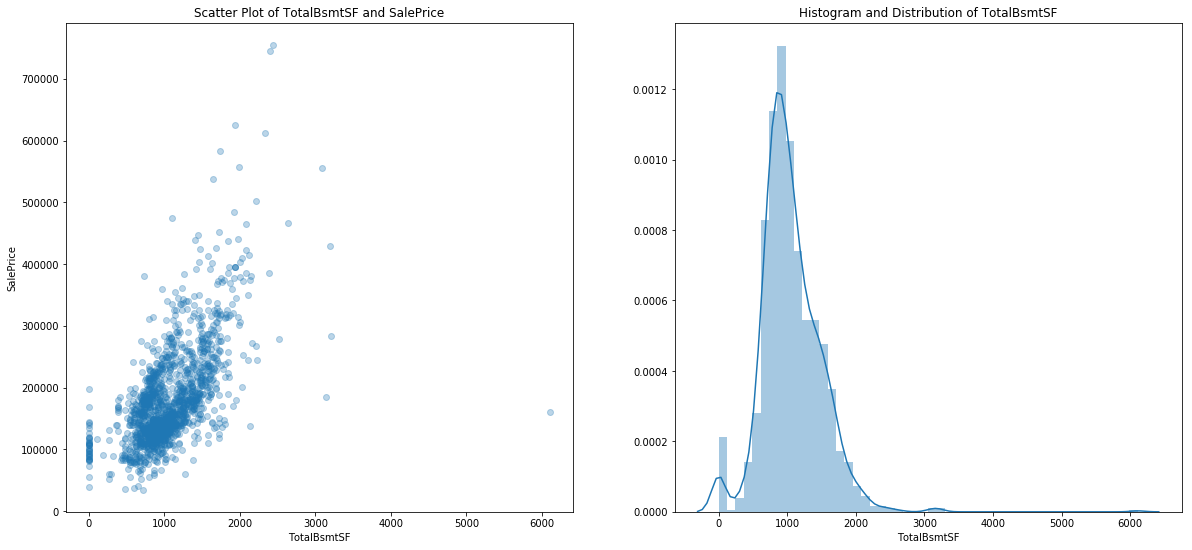

<Figure size 432x288 with 0 Axes>

In [40]:
plot.scatter_hist(train,'TotalBsmtSF','SalePrice',False)

The scatter plot of total basement square footage and sales price shows a very strong, positive correlation between the two. If you increase the square footage, the sales price will increase.

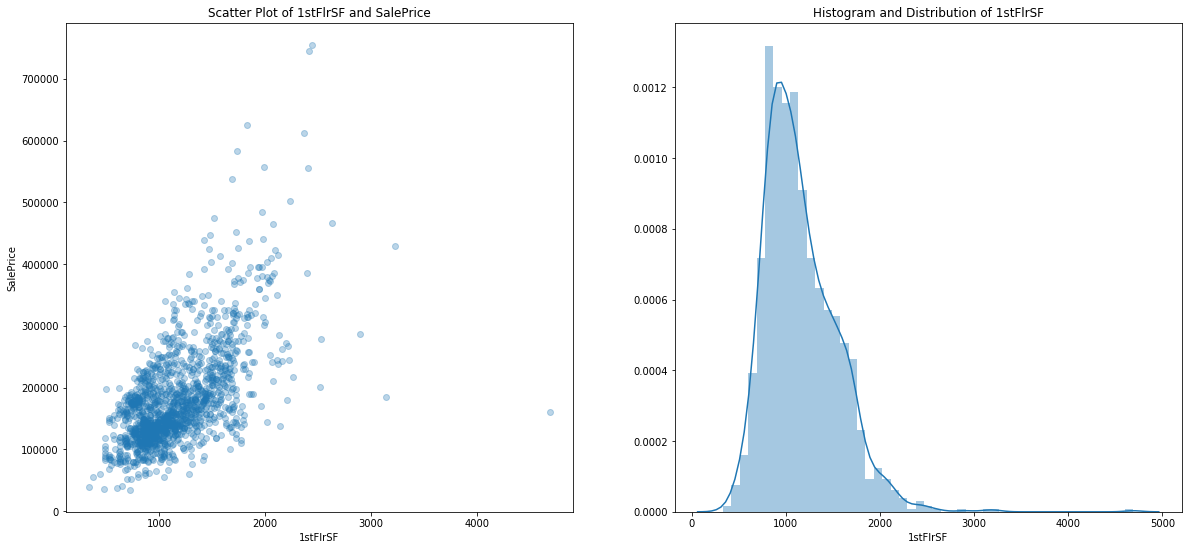

<Figure size 432x288 with 0 Axes>

In [41]:
plot.scatter_hist(train,'1stFlrSF','SalePrice',False)

Like the total basement square footage, the 1st floor square footage has a strong, positive correlation with sales price.

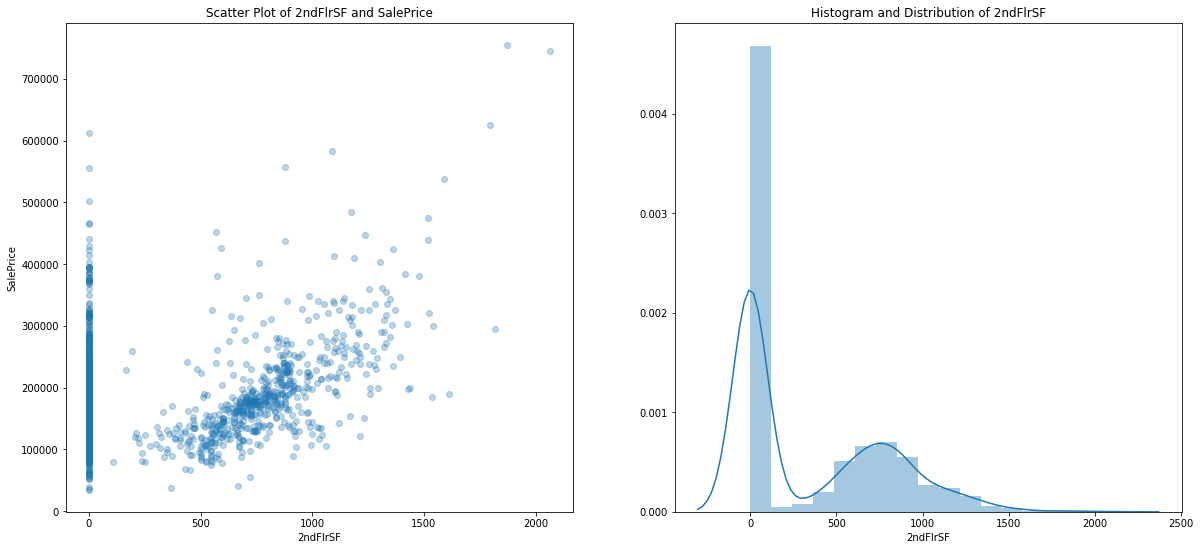

<Figure size 432x288 with 0 Axes>

In [42]:
plot.scatter_hist(train,'2ndFlrSF','SalePrice',False)

For houses that have a second floor, there seems to be a strong correlation between square footage and sales price. If you take out the houses without a second floor, the correlation becomes 0.67, which means when you increase square footage, the sales price increases.

In [43]:
second_floor = train[train['2ndFlrSF'] > 0]
second_floor[['SalePrice','2ndFlrSF']].corr()

,SalePrice,2ndFlrSF
SalePrice,1.000000,0.673305
2ndFlrSF,0.673305,1.000000


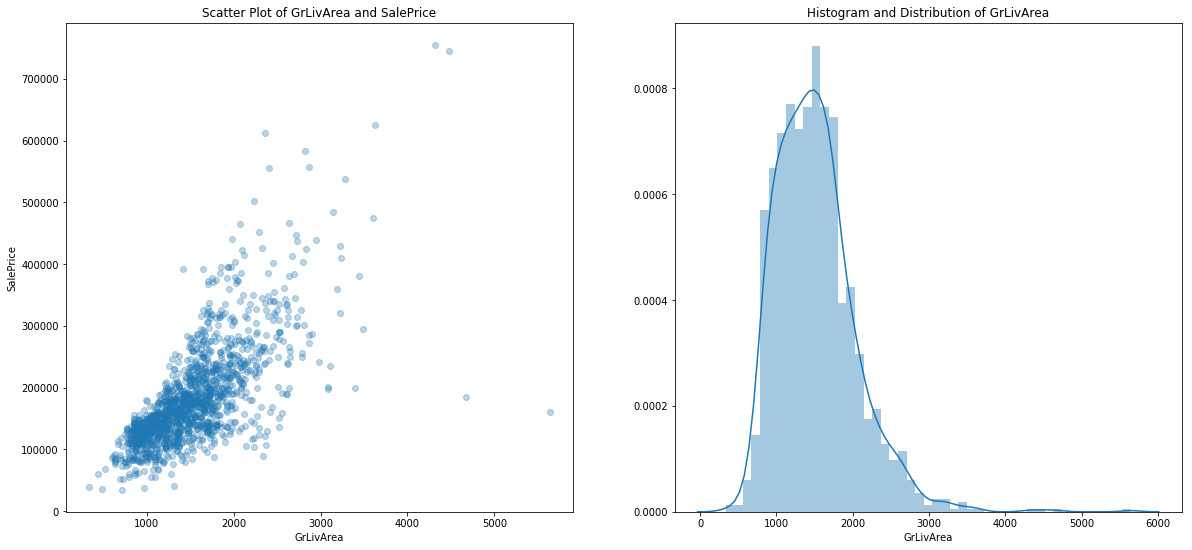

<Figure size 432x288 with 0 Axes>

In [44]:
plot.scatter_hist(train,'GrLivArea','SalePrice',False)

The plot above shows the scatterplot of sales price and ground level square footage. There is a strong positive correlation between the two so when you increase square footage, the sale price increases. The distribution of the dataset shows a skew to the right.

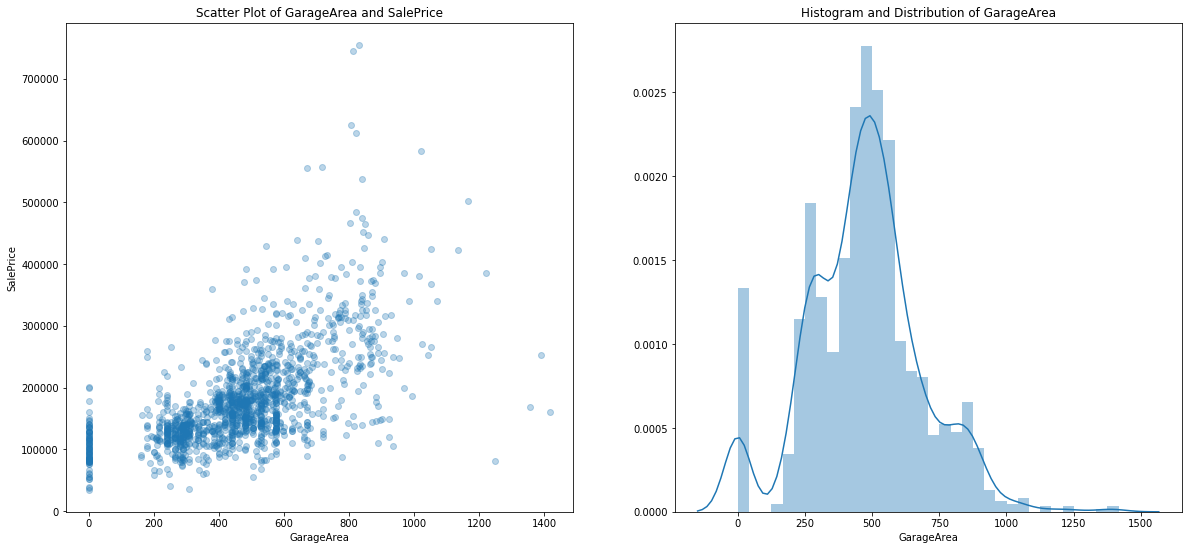

<Figure size 432x288 with 0 Axes>

In [45]:
plot.scatter_hist(train,'GarageArea','SalePrice',False)

According to the scatterplot above, the increase in garage area causes the sale price to increase. The distribution shows a little bit of skew and also is multi-modal.

# Categorical Features

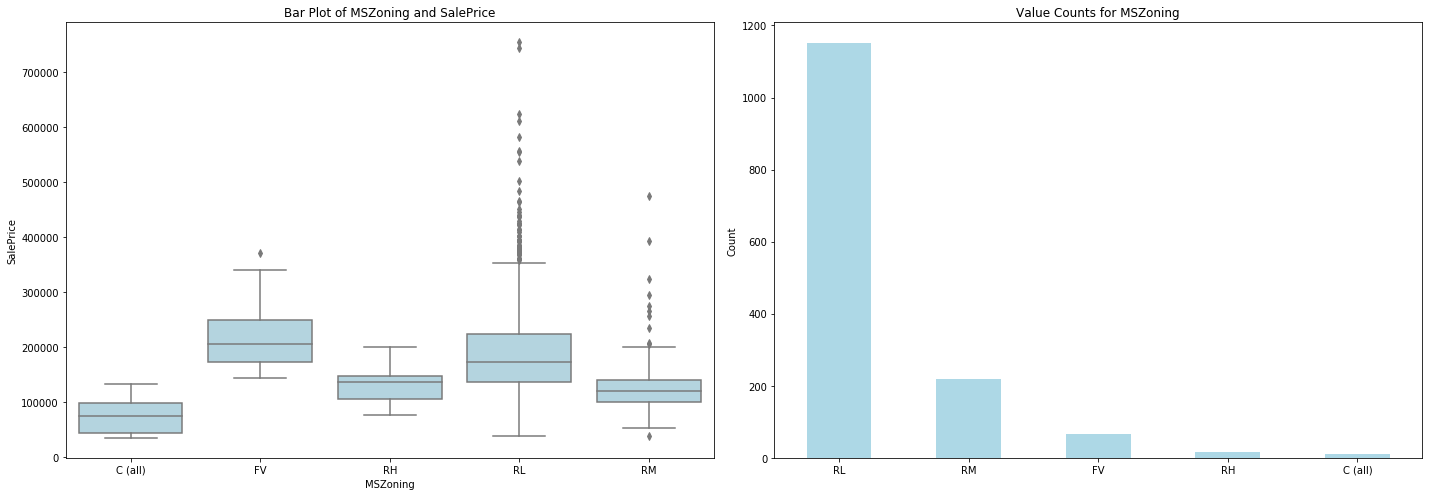

In [46]:
plot.bar_box(train,'MSZoning','SalePrice')

The plots above show the spread of sale price based on the different types of zones and the counts of each type in the dataset. The boxplot on the left shows that there are differences in prices based on the zoning type and that most of the houses are in residential low density areas and residential medium density areas. 

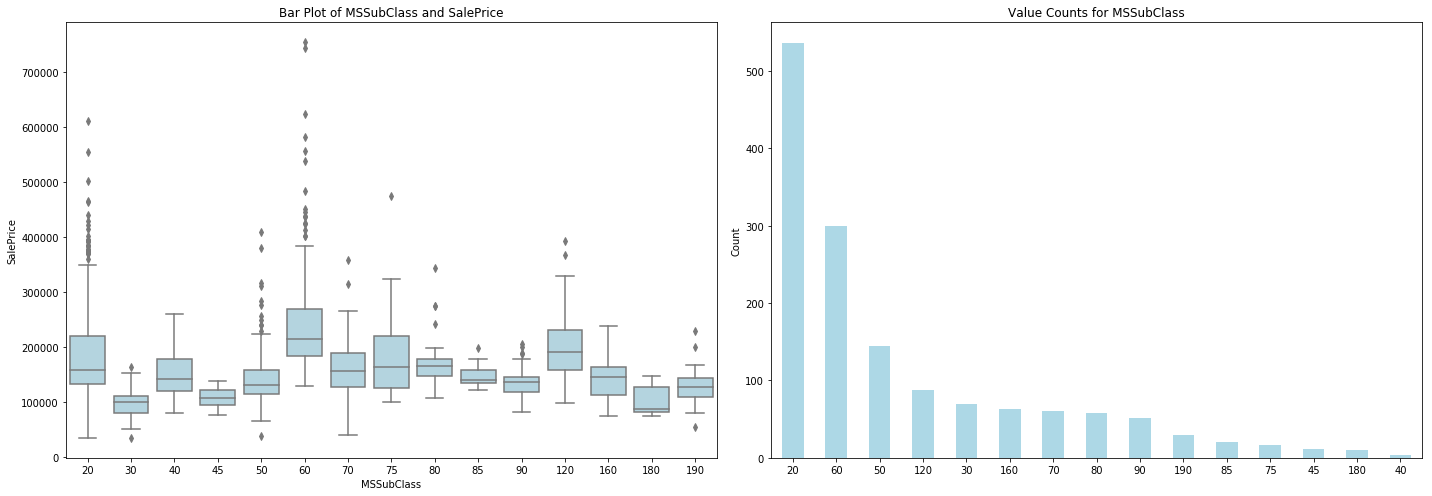

In [47]:
plot.bar_box(train,'MSSubClass','SalePrice')

The counts of the different classes of houses show that most houses are newer (built after 1946) and either 1 or 2 stories. There are differences between all of the different types of houses based on the boxplot on the left.

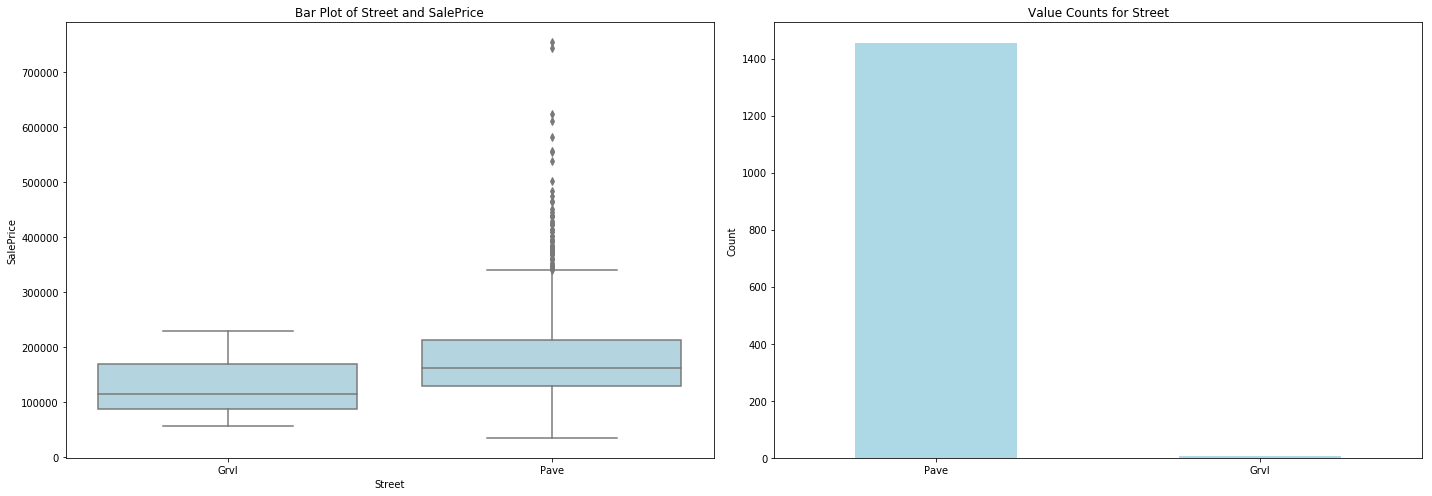

In [48]:
plot.bar_box(train,'Street','SalePrice')

The boxplot of the street type shows that there is a difference between paved streets and gravel streets but there are only a small amount of houses that have a gravel street in the dataset.

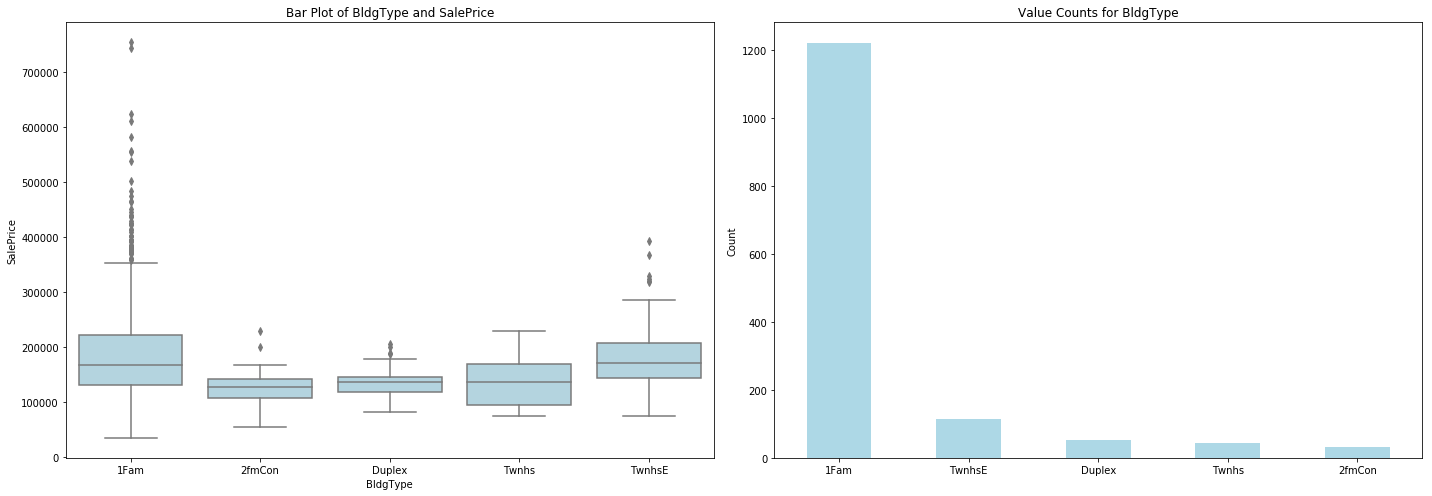

In [49]:
plot.bar_box(train,'BldgType','SalePrice')

According to the plot on the right above, most houses in the dataset at single family houses. There are differences in sales prices but they don't seem to be as large as some of the other features.

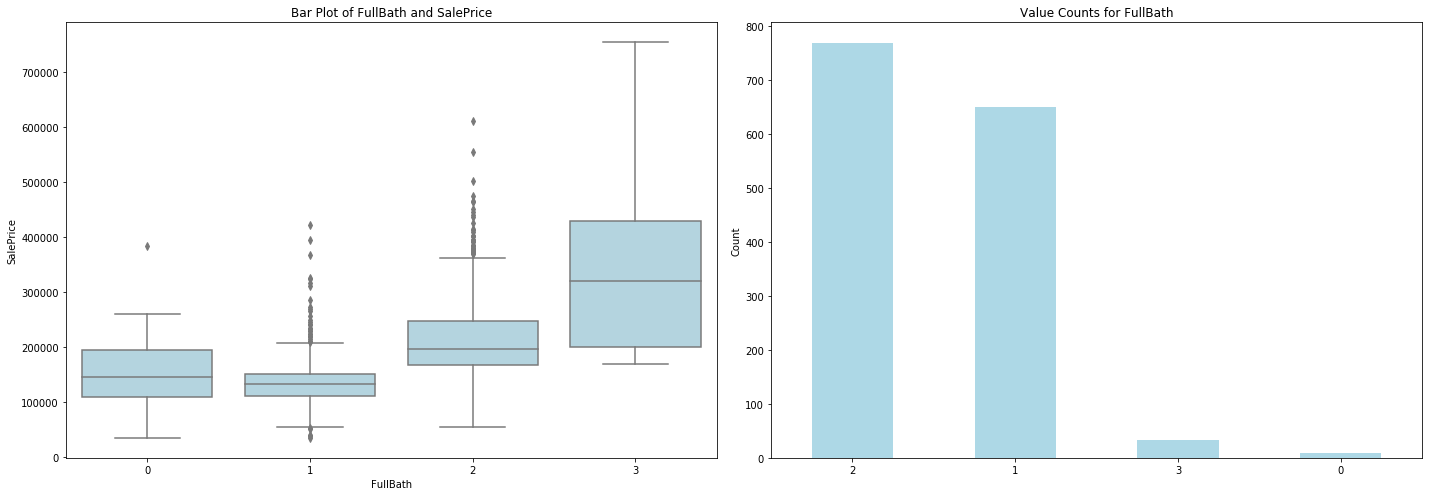

In [50]:
plot.bar_box(train,'FullBath','SalePrice')

This dataset contains mostly 1 and 2 full bathroom houses. When a house has more bathrooms, the sale price of the house goes up according to the boxplot.

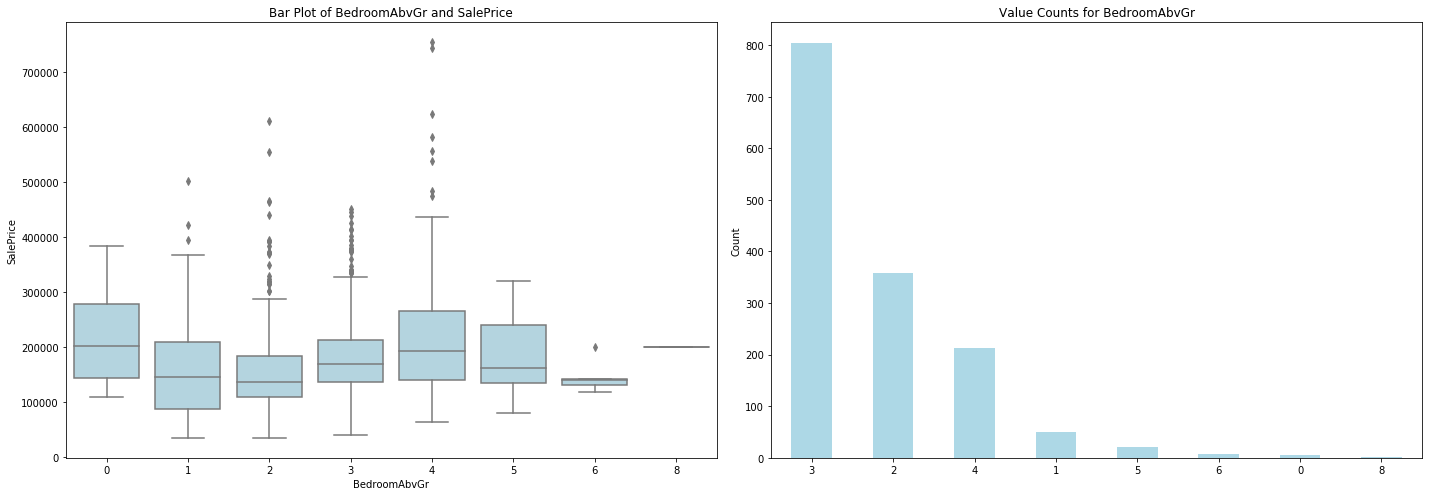

In [51]:
plot.bar_box(train,'BedroomAbvGr','SalePrice')

The plots above show that when the number of bedrooms above ground increase from 2 to 4 (most houses have between 2 and 4 bedrooms according to the graph on the right), the sale price increases. There are smaller numbers of houses with 1, 5, 6, and 7 bedrooms so the data is not consistent with the increase in sale price. You'd expect that more rooms would lead to higher sales prices.

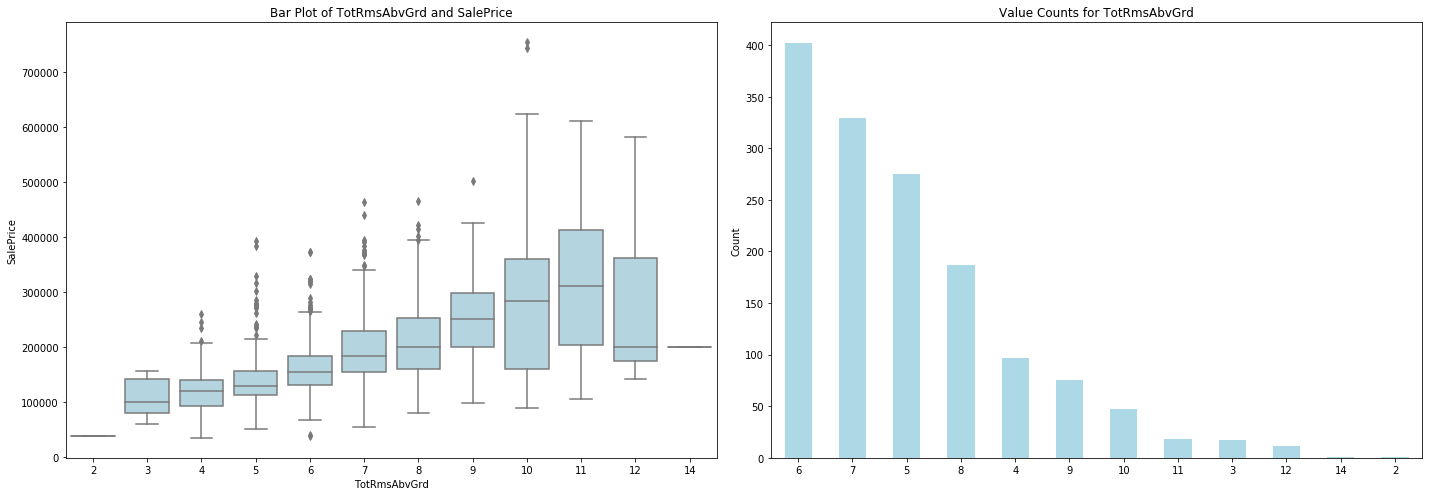

In [52]:
plot.bar_box(train,'TotRmsAbvGrd','SalePrice')

Looking at the two graphs above, you can see that increasing the number of rooms above ground causes the sale price to increase. You can also see that there is more variation in the price when there are more rooms. 

Most of the houses in this dataset contain between 5 and 7 rooms above ground.

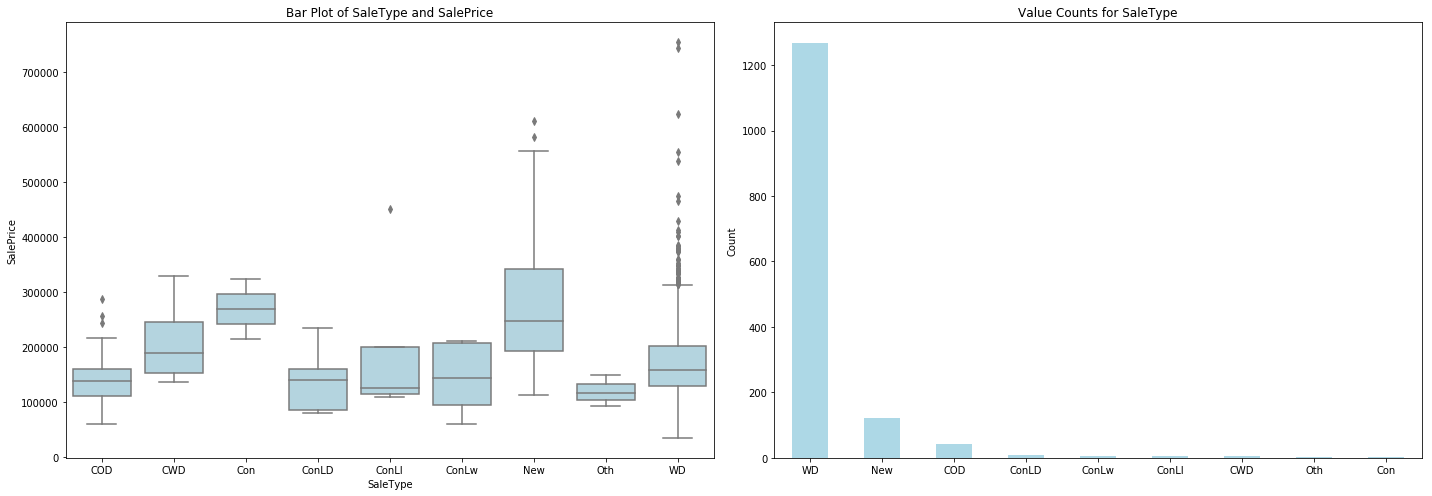

In [53]:
plot.bar_box(train,'SaleType','SalePrice')

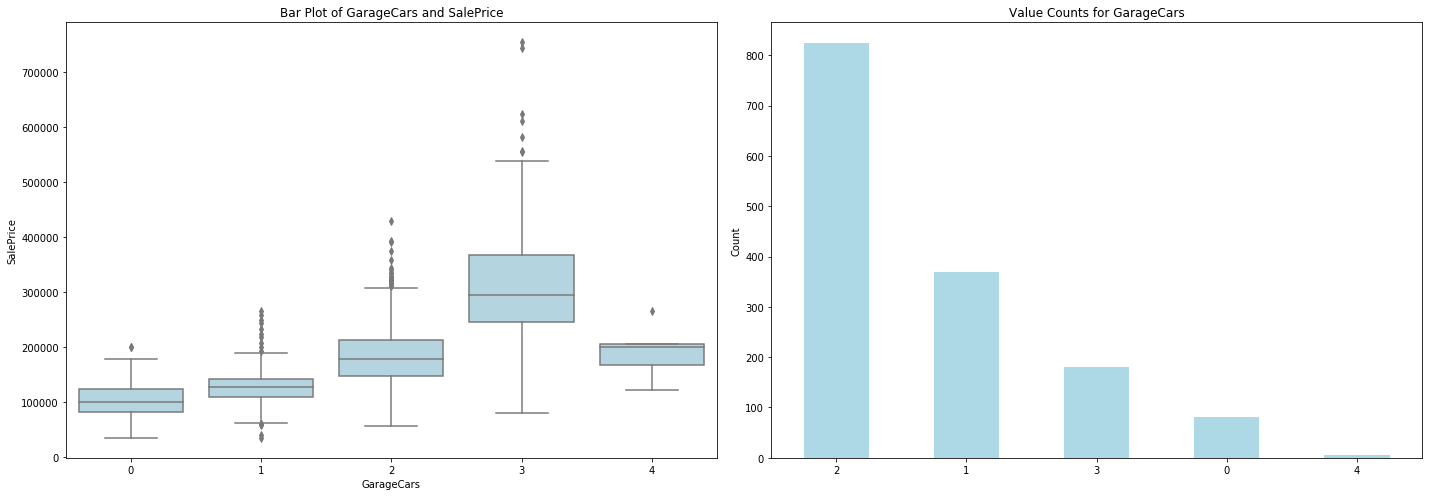

In [54]:
plot.bar_box(train,'GarageCars','SalePrice')

According to the graphs above, as the number of cars that can fit in the garage increases, the sale price of a house also increases.

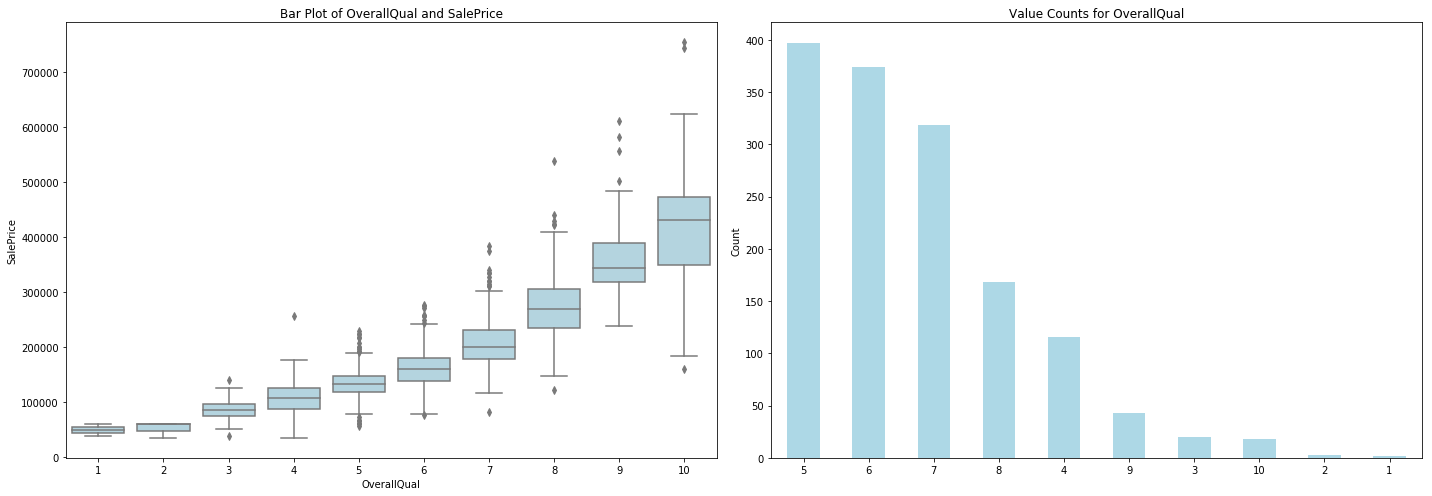

In [55]:
plot.bar_box(train,'OverallQual','SalePrice')

As the quality of the house increases, the price increases. 

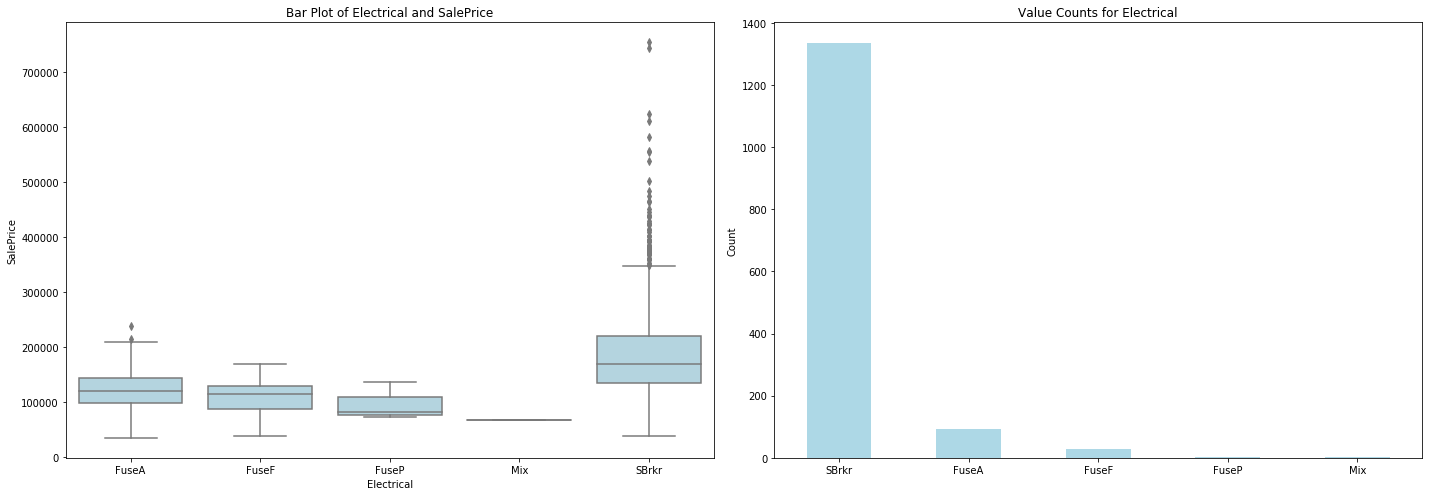

In [56]:
plot.bar_box(train,'Electrical','SalePrice')

Houses with standard circuit breakers have a higher sale price and most houses in the dataset have circuit breakers.

# Feature Engineering

The first new feature that was created was number of bathrooms in the house. To create this, the half baths were multiplied by 0.5 and added to the number of full baths.

In [57]:
train['bathrooms'] = (train['HalfBath'].astype('int') * 0.5 + train['FullBath'].astype('int') \
                    + train['BsmtFullBath'].astype('int') + train['BsmtHalfBath'].astype('int') * 0.5 \
                     ).astype('category')

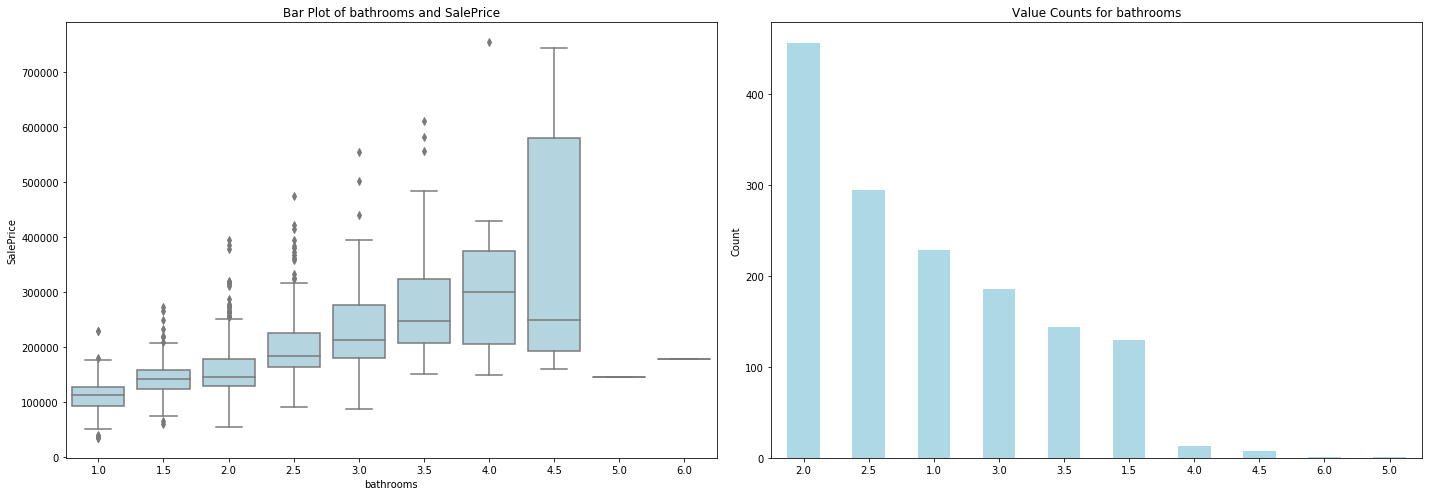

In [58]:
plot.bar_box(train,'bathrooms','SalePrice')

According to the graphs above, most houses have 2 or 2.5 bathrooms and as you increase the number of bathrooms, the sale price increases.

In [59]:
train[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF','LowQualFinSF']].head()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF
0,706,0,150,856,854,0
1,978,0,284,1262,0,0
2,486,0,434,920,866,0
3,216,0,540,961,756,0
4,655,0,490,1145,1053,0


The next two features created was total square feet of all finished parts of the house and total square feet including the unfinished parts. This was done by adding up the basement square feet, the 1st floor square feet, the 2nd floor square feet, and the unfinished basement square feet.

In [60]:
train['total_sq_ft'] = train['BsmtFinSF1'] + train['BsmtFinSF2'] + train['1stFlrSF'] + train['2ndFlrSF']

In [61]:
train[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF','LowQualFinSF','total_sq_ft']].head()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,total_sq_ft
0,706,0,150,856,854,0,2416
1,978,0,284,1262,0,0,2240
2,486,0,434,920,866,0,2272
3,216,0,540,961,756,0,1933
4,655,0,490,1145,1053,0,2853


In [62]:
train['total_sq_ft_plus_unf'] = train['BsmtFinSF1'] + train['BsmtFinSF2'] + train['1stFlrSF'] + train['2ndFlrSF'] \
                                + train['BsmtUnfSF']

In [63]:
train[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF','LowQualFinSF','total_sq_ft', \
       'total_sq_ft_plus_unf']].head()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,total_sq_ft,total_sq_ft_plus_unf
0,706,0,150,856,854,0,2416,2566
1,978,0,284,1262,0,0,2240,2524
2,486,0,434,920,866,0,2272,2706
3,216,0,540,961,756,0,1933,2473
4,655,0,490,1145,1053,0,2853,3343


The total square feet of the house and the total square feet of the house including unfinished parts both are highly correlated with the sale price, as expected. They are also both correlated with each other, which was also expected. 

In [64]:
train[['SalePrice','total_sq_ft','total_sq_ft_plus_unf']].corr()

,SalePrice,total_sq_ft,total_sq_ft_plus_unf
SalePrice,1.000000,0.708047,0.782260
total_sq_ft,0.708047,1.000000,0.848295
total_sq_ft_plus_unf,0.782260,0.848295,1.000000


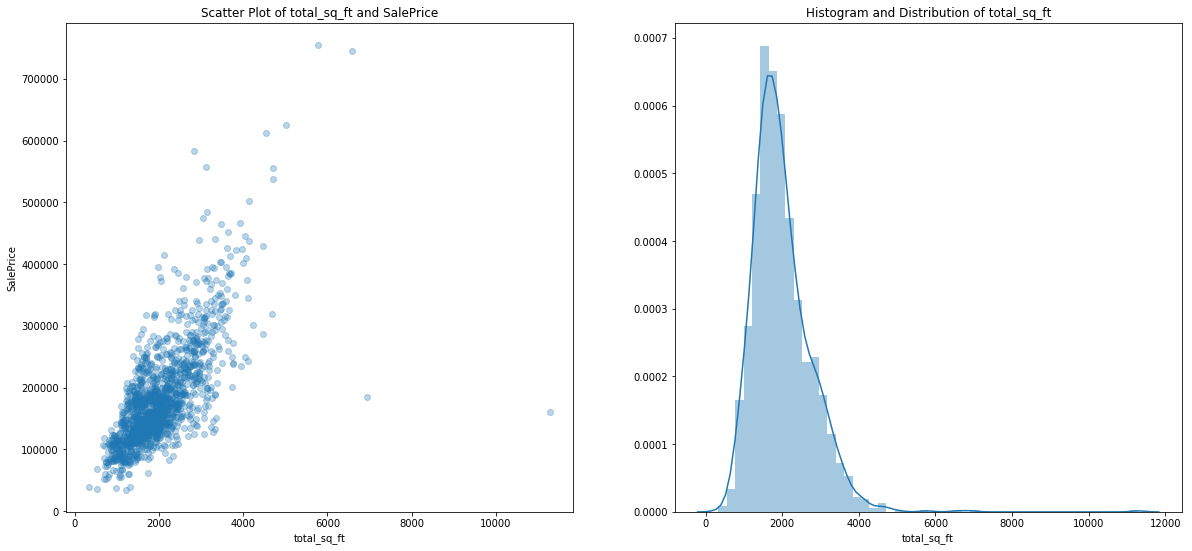

<Figure size 432x288 with 0 Axes>

In [65]:
plot.scatter_hist(train,'total_sq_ft','SalePrice')

Looking at the scatter plot for total square feet, you can see that as the square footage increases, the sale price also increases.

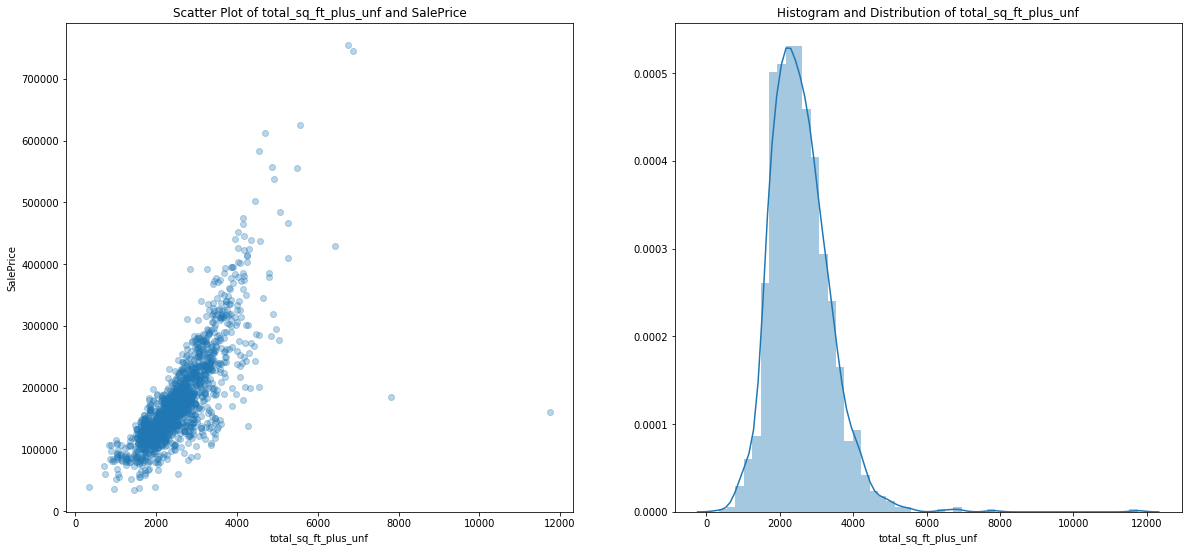

<Figure size 432x288 with 0 Axes>

In [66]:
plot.scatter_hist(train,'total_sq_ft_plus_unf','SalePrice')

Looking at the square footage with unfinished parts and the sale price, you can also see there is an increase in sale price when the square footage increases. Both histograms show a right skew and both might need to be transformed to remove this skew.

In [68]:
len(train[(train['YearBuilt'].astype(int)) < (train['YearRemodAdd'].astype(int))])

696

In [69]:
train[(train['YearBuilt'].astype(int)) < (train['YearRemodAdd'].astype(int))][['YearBuilt','YearRemodAdd']]

,YearBuilt,YearRemodAdd
2,2001,2002
3,1915,1970
5,1993,1995
6,2004,2005
8,1931,1950
9,1939,1950
11,2005,2006
13,2006,2007
15,1929,2001
19,1958,1965


In [72]:
def remod(row):
    remod = 0
    if row['YearRemodAdd'] > row['YearBuilt']:
        remod = 1
    return remod

In [73]:
train['remodel'] = train.apply(remod, axis=1)

In [74]:
train['remodel'].value_counts()

0    764
1    696
Name: remodel, dtype: int64

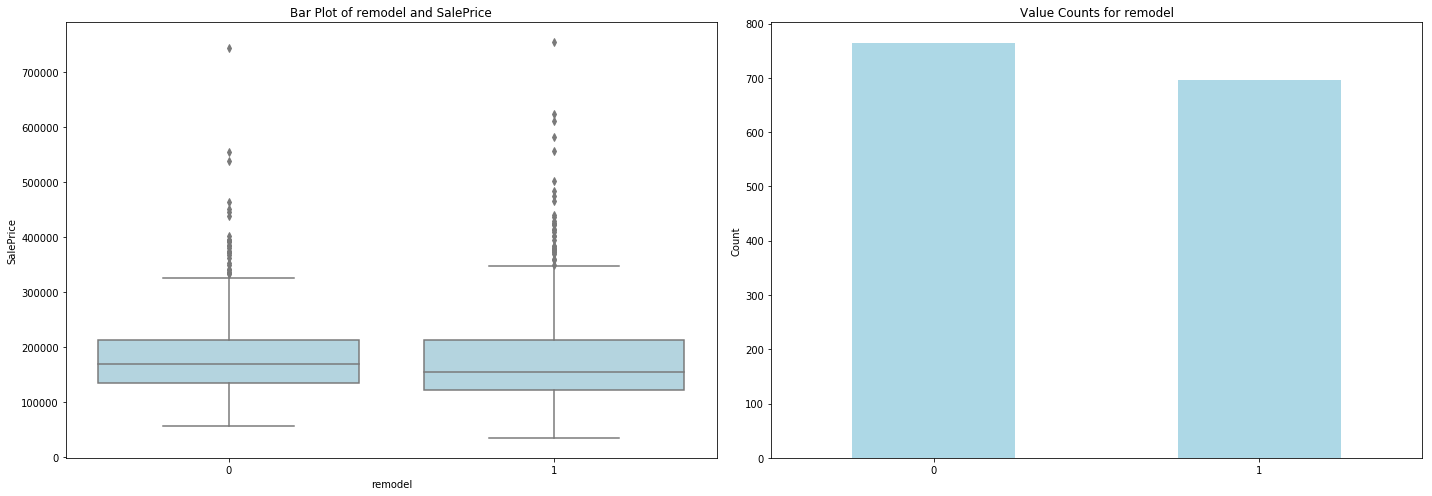

In [75]:
plot.bar_box(train,'remodel','SalePrice')

In [76]:
train['total_porch_sf'] = train['WoodDeckSF'] + train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + \
                          train['ScreenPorch']

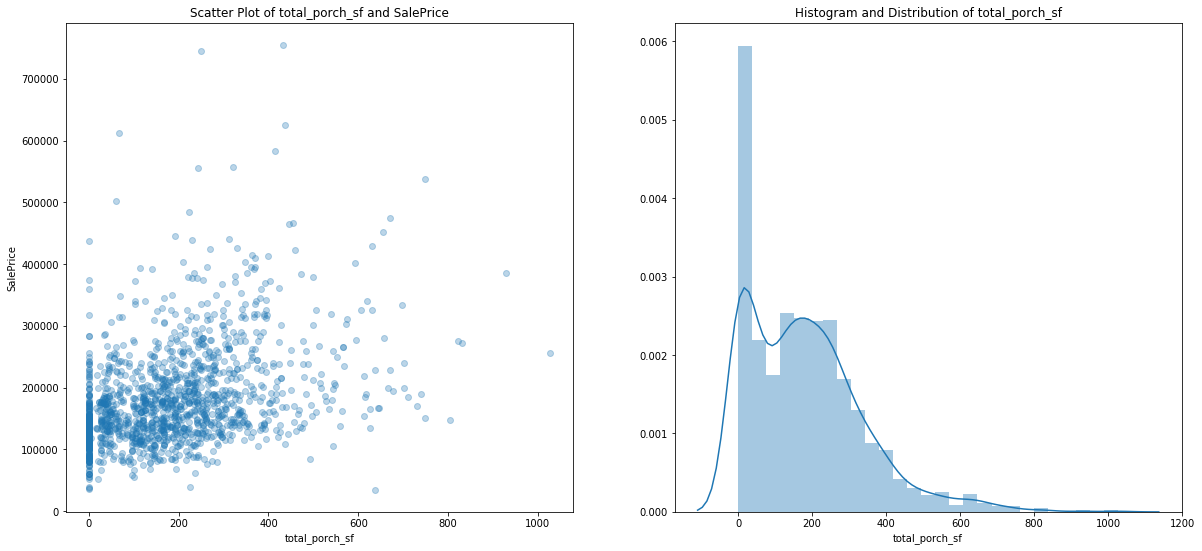

<Figure size 432x288 with 0 Axes>

In [77]:
plot.scatter_hist(train,'total_porch_sf','SalePrice',False)

In [78]:
train[['total_porch_sf','SalePrice']].corr()

,total_porch_sf,SalePrice
total_porch_sf,1.000000,0.390993
SalePrice,0.390993,1.000000


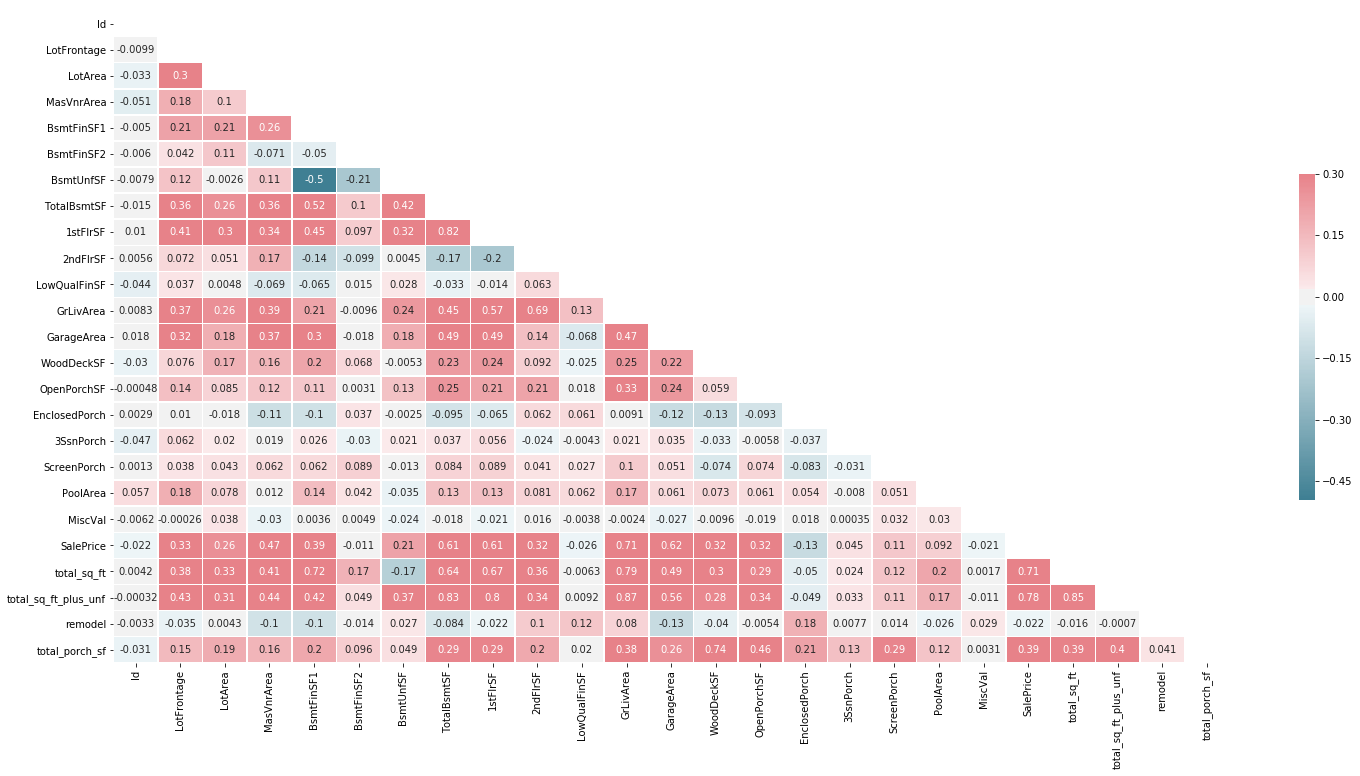

In [79]:
nums2 = train.select_dtypes(exclude='category')
plot.heatmap(nums2)

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Id                      1460 non-null int64
MSSubClass              1460 non-null category
MSZoning                1460 non-null category
LotFrontage             1460 non-null float64
LotArea                 1460 non-null int64
Street                  1460 non-null category
LotShape                1460 non-null category
LandContour             1460 non-null category
Utilities               1460 non-null category
LotConfig               1460 non-null category
LandSlope               1460 non-null category
Neighborhood            1460 non-null category
Condition1              1460 non-null category
Condition2              1460 non-null category
BldgType                1460 non-null category
HouseStyle              1460 non-null category
OverallQual             1460 non-null category
OverallCond             1460 non-null category
YearBuilt               1460 non-null category
YearRem

# Simple Linear Regression

The first simple linear regression to use 

In [81]:
y = train[['SalePrice']]
X = train[['total_sq_ft','bathrooms']]
X = pd.get_dummies(X, columns=['bathrooms'], drop_first=True)
X.head()

,total_sq_ft,bathrooms_1.5,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,bathrooms_4.5,bathrooms_5.0,bathrooms_6.0
0,2416,0,0,0,0,1,0,0,0,0
1,2240,0,0,1,0,0,0,0,0,0
2,2272,0,0,0,0,1,0,0,0,0
3,1933,0,1,0,0,0,0,0,0,0
4,2853,0,0,0,0,1,0,0,0,0


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1095, 10), (365, 10), (1095, 1), (365, 1))

In [83]:
model = LinearRegression()
param_grid = {}
gs = GridSearchCV(model, param_grid, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [84]:
pred = gs.predict(X_test)
model_r = r2_score(y_test, pred)
model_mse = mean_squared_error(y_test, pred)
model_rmse = np.sqrt(model_mse)
adjustedr = 1 - (1-model_r)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [85]:
print('Model R Squared: ' + str(model_r))
print('Adjusted R Squared: ' + str(adjustedr))
print('RMSE: ' + str(model_rmse)) 
print('MSE: ' + str(model_mse))

Model R Squared: 0.47427144890082573
Adjusted R Squared: 0.4594203598867248
RMSE: 53282.958521793684
MSE: 2839073668.8351865


# Fit Test Data

In [86]:
test = pd.read_csv('test.csv')

In [87]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [88]:
test['FullBath'] = train['FullBath'].fillna(0)
test['HalfBath'] = train['HalfBath'].fillna(0)
test['BsmtFullBath'] = train['BsmtFullBath'].fillna(0)
test['BsmtHalfBath'] = train['BsmtHalfBath'].fillna(0)
test['BsmtFinSF1'] = train['BsmtFinSF1'].fillna(0)
test['BsmtFinSF2'] = train['BsmtFinSF2'].fillna(0)
test['1stFlrSF'] = train['1stFlrSF'].fillna(0)
test['2ndFlrSF'] = train['2ndFlrSF'].fillna(0)

In [89]:
test['MSSubClass'] = test['MSSubClass'].astype('category')
test['OverallQual'] = test['OverallQual'].astype('category')
test['OverallCond'] = test['OverallCond'].astype('category')
test['YearBuilt'] = test['YearBuilt'].astype('category')
test['YearRemodAdd'] = test['YearRemodAdd'].astype('category')
test['GarageYrBlt'] = test['GarageYrBlt'].astype('category')
test['MoSold'] = test['MoSold'].astype('category')
test['YrSold'] = test['YrSold'].astype('category')
test['GarageCars'] = test['GarageCars'].astype('category')
test['Fireplaces'] = test['Fireplaces'].astype('category')
test['TotRmsAbvGrd'] = test['TotRmsAbvGrd'].astype('category')
test['KitchenAbvGr'] = test['KitchenAbvGr'].astype('category')
test['BedroomAbvGr'] = test['BedroomAbvGr'].astype('category')
test['HalfBath'] = test['HalfBath'].astype('category')
test['FullBath'] = test['FullBath'].astype('category')
test['BsmtHalfBath'] = test['BsmtHalfBath'].astype('category')
test['BsmtFullBath'] = test['BsmtFullBath'].astype('category')
test['BedroomAbvGr'] = test['BedroomAbvGr'].astype('category')

In [90]:
test['bathrooms'] = (test['HalfBath'].astype('int') * 0.5 + test['FullBath'].astype('int') \
                    + test['BsmtFullBath'].astype('int') + test['BsmtHalfBath'].astype('int') * 0.5 \
                     ).astype('category')
test['total_sq_ft'] = (test['BsmtFinSF1'] + test['BsmtFinSF2'] + test['1stFlrSF'] + test['2ndFlrSF']).astype('int')

In [91]:
test_df = test[['total_sq_ft','bathrooms']]
test_df = pd.get_dummies(test_df, columns=['bathrooms'], drop_first=True)
test_df.head()

,total_sq_ft,bathrooms_1.5,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,bathrooms_4.5,bathrooms_5.0,bathrooms_6.0
0,2416,0,0,0,0,1,0,0,0,0
1,2240,0,0,1,0,0,0,0,0,0
2,2272,0,0,0,0,1,0,0,0,0
3,1933,0,1,0,0,0,0,0,0,0
4,2853,0,0,0,0,1,0,0,0,0


In [92]:
test_pred = gs.predict(test_df)
test_pred

array([[252414.50738093],
       [206768.62402183],
       [244517.76935503],
       ...,
       [251037.68142506],
       [205894.4103508 ],
       [180723.55789326]])

In [93]:
df_dict = {'Id':np.array(list(test['Id'])), 'SalePrice':test_pred.ravel()}
df_dict

{'Id': array([1461, 1462, 1463, ..., 2917, 2918, 2919]),
 'SalePrice': array([252414.50738093, 206768.62402183, 244517.76935503, ...,
        251037.68142506, 205894.4103508 , 180723.55789326])}

In [94]:
sol_df = pd.DataFrame.from_dict(df_dict)
sol_df.head()

,Id,SalePrice
0,1461,252414.507381
1,1462,206768.624022
2,1463,244517.769355
3,1464,168494.581645
4,1465,276378.913751


In [95]:
sol_df[['Id','SalePrice']].to_csv('simple_linear.csv', index=False)

In [96]:
train.to_csv('updated_train.csv', index=False)